# Neuroscience dataset
Instead of MNIST we can try our hands on a learn world data set for use in training a deep neural network for classification.

## The default mode network
The default mode network is a brain area that is active during rest. It is the neurological basis for the self

## The task positive network
The task positive network is active when you are doing a task and focusing your attention.

## Anticorrelations
The task positive network and the default mode network are anti-correlated brain regions and you spend your time in either brain region.

## Classifying brain region activation
The goal of this assignment is to see if we can make a classifier that can understand what brain region is active. 


Building your own feedforward neural network | Code |

Example dataset for predicting brain states from neuroscience.
![alt text](https://i.imgur.com/KYYDM8j.png)

In [13]:
# import depencies
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy
import keras


In [15]:
# there are 51 datasets and a master dataset in the folder
dataset = pd.read_csv("./Data/IDOXY_full/ID-OXY-20.csv")
# split into input (X) and output 󰀀 variables

# Remove missing values
dataset = dataset.dropna()

In [16]:
# explore our dataset
dataset.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,CH46,CH47,CH48,CH49,CH50,CH51,CH52,FILENUM,IDNUM,YEAR
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.0,2964.0
mean,-0.098639,-0.080632,-0.085239,-0.133282,-0.121094,-0.125869,-0.272056,-0.147523,-0.058270,-0.084198,...,-0.066687,-0.082994,-0.036419,-0.104772,-0.168010,-0.157450,-0.155047,1.500000,20.0,2015.0
std,0.411495,0.427155,0.421882,0.364581,0.346323,0.337531,0.398445,0.305088,0.145448,0.133700,...,0.332937,0.307317,0.310955,0.363039,0.364235,0.346898,0.237520,1.118223,0.0,0.0
min,-3.502763,-4.173898,-3.752554,-3.064770,-2.924323,-2.759672,-3.390571,-2.901140,-0.606639,-0.830974,...,-3.000632,-2.545604,-2.388231,-2.971010,-3.032118,-2.844047,-2.632690,0.000000,20.0,2015.0
25%,-0.085554,-0.046429,-0.140970,-0.207377,-0.124557,-0.208488,-0.387515,-0.173952,-0.121206,-0.127916,...,-0.084917,-0.092350,-0.095176,-0.188482,-0.313976,-0.324448,-0.254947,0.750000,20.0,2015.0
50%,-0.040837,-0.013069,-0.033112,-0.024097,-0.057567,-0.069892,-0.146257,-0.093808,-0.062570,-0.069809,...,-0.019725,-0.031317,0.003473,-0.015308,-0.087416,-0.059512,-0.149917,1.500000,20.0,2015.0
75%,-0.002713,0.025542,0.067370,0.044101,-0.015604,0.036087,-0.079295,-0.037344,-0.016532,-0.013833,...,0.041213,0.009463,0.103559,0.061548,0.024688,0.060642,-0.060534,2.250000,20.0,2015.0
max,0.267535,0.114364,0.308468,0.230702,0.145056,0.248736,0.027059,0.150766,1.671602,0.797454,...,0.237260,0.214923,0.304574,0.217142,0.633399,0.360677,0.516628,3.000000,20.0,2015.0


In [19]:
# Clean up the dataset for use in training
# change rest values to 
# default mode
dataset["Mark"][dataset["Mark"] == "REST"] = 0
# task positive network
dataset["Mark"][dataset["Mark"] == "ADDITION"] = 1
dataset["Mark"][dataset["Mark"] == "PASSTHOUGHT"] = 2
dataset["Mark"][dataset["Mark"] == "JUNK"] = 3

# remove the unused markers data
dataset = dataset[dataset.Mark != 2]
dataset = dataset[dataset.Mark != 3]

In [20]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Shuffle the data
dataset = dataset.sample(frac=1)

In [21]:
# Setting up the X and Y
# 52 broadmann areas data
X = np.array(dataset.ix[:, :'CH52'])
# default mode network or task positive network
Y = np.array([[1,0] if i == 0 else [0,1] for i in dataset.Mark])

In [22]:
# Dropout - the number of neurons removed at each layers, who are readded when testing
# Batch size - the number of data points added at each time, affects training time
# Epochs - the number of training/test sessions

# create model
model = Sequential()

# makes the values between 0 and 1
model.add(BatchNormalization(input_shape=(52,)))
model.add(Dropout(0.3))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, init="normal", activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, init="normal", activation='relu'))

model.add(Dense(2, init="normal", activation='softmax'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.5, nb_epoch=50, batch_size=50, verbose=1)



Train on 656 samples, validate on 656 samples
Epoch 1/50
656/656 [==============================] - 1s 805us/step - loss: 0.2415 - acc: 0.5152 - val_loss: 0.2374 - val_acc: 0.4787
Epoch 2/50
656/656 [==============================] - 0s 81us/step - loss: 0.2338 - acc: 0.5229 - val_loss: 0.2293 - val_acc: 0.7073
Epoch 3/50
656/656 [==============================] - 0s 87us/step - loss: 0.2262 - acc: 0.6159 - val_loss: 0.2240 - val_acc: 0.7134
Epoch 4/50
656/656 [==============================] - 0s 100us/step - loss: 0.2179 - acc: 0.6677 - val_loss: 0.2084 - val_acc: 0.7576
Epoch 5/50
656/656 [==============================] - 0s 84us/step - loss: 0.2049 - acc: 0.7027 - val_loss: 0.1851 - val_acc: 0.7942
Epoch 6/50
656/656 [==============================] - 0s 60us/step - loss: 0.1904 - acc: 0.7210 - val_loss: 0.1643 - val_acc: 0.7973
Epoch 7/50
656/656 [==============================] - 0s 61us/step - loss: 0.1820 - acc: 0.7287 - val_loss: 0.1466 - val_acc: 0.8201
Epoch 8/50
656/656 [=

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


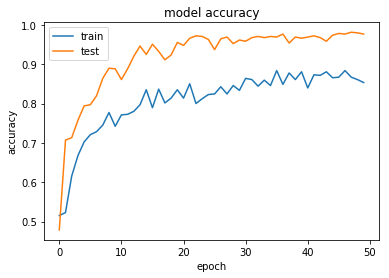

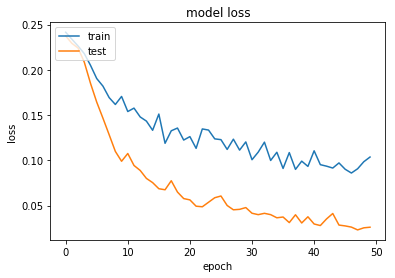

In [23]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Try out tuning hyperparameters to improve the accuracy of the model.
You can try tuning different hyperparamaters to improve your predictions.